In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif,chi2, mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
drive.mount('/content/drive/')


datapath = "/content/drive/MyDrive/hwo3/Training Data.csv"
df=pd.read_csv(datapath)
display(df)
dft = "/content/drive/MyDrive/hwo3/test.csv"
#dft=pd.read_csv(dft)
dataset = df.drop(['Id'],axis=1)
dataset.head()
dataset = df.drop(['Id'],axis=1)
dataset.head()
######example for change data
from sklearn.compose import make_column_selector as selector

#numerical_columns_selector = selector(dtype_exclude=object)
#categorical_columns_selector = selector(dtype_include=object)
#numerical_columns = numerical_columns_selector(data)
#categorical_columns = categorical_columns_selector(data)
#dataset[categorical_columns] = dataset[categorical_columns].apply(LabelEncoder().fit_transform) 


######
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object) 
categorical_columns_selector = selector(dtype_include=object) 
numerical_columns = numerical_columns_selector(dataset)
categorical_columns = categorical_columns_selector(dataset)
print('neumerical columns:',numerical_columns)
print('categorical columns:',categorical_columns)
dataset[categorical_columns] = dataset[categorical_columns].apply(LabelEncoder().fit_transform) 
dataset.head()
TruePosetive = 0
TrueNegative = 0
FulsePosetive = 0
FulseNegative = 0

Mounted at /content/drive/


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


neumerical columns: ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
categorical columns: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


In [2]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(X, y)
cols = selector.get_support(indices=True) 
print('the best of them: ',selector.get_feature_names_out())
dataset = dataset.iloc[:,cols]
dataset['labels'] = y
dataset.head()

the best of them:  ['Age' 'Experience' 'Married/Single' 'House_Ownership' 'Car_Ownership'
 'CURRENT_JOB_YRS']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,labels
0,23,3,1,2,0,3,0
1,40,10,1,2,0,9,0
2,66,4,0,2,0,4,0
3,41,2,1,2,1,2,1
4,47,11,1,2,0,3,1


In [ ]:
df=dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   Married/Single     252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int64
 7   CITY               252000 non-null  int64
 8   STATE              252000 non-null  int64
 9   CURRENT_JOB_YRS    252000 non-null  int64
 10  CURRENT_HOUSE_YRS  252000 non-null  int64
 11  Risk_Flag          252000 non-null  int64
dtypes: int64(12)
memory usage: 33.1 MB


In [ ]:
df.shape

(252000, 12)

In [ ]:
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [ ]:
train_data = dataset.iloc[:math.floor(0.8*dataset.shape[0]),:]
test_data = dataset.iloc[math.floor(0.8*dataset.shape[0]):,:]
High = train_data.loc[train_data['labels']==1]
Low = train_data.loc[train_data['labels']==0]

In [ ]:
#help code for transition matrix

In [ ]:
def get_transition_matrix(dataset): # TCN
    from config import gesture_class_num

    class_num = gesture_class_num + 1  # Including Init
    matrix = np.zeros((class_num, class_num))  # 10: Init

    for data in dataset:
        gesture = data['label']

        last = class_num - 1  #init
        for i in range(len(gesture)):
            current = int(gesture[i])
            matrix[last][current] += 1
            last = current

    return matrix.astype(int) 

In [ ]:
#####

In [39]:

def transition_matrixes(dataset):

  Transition_matrixes = []
  
  tran_matrix_first = np.zeros((10,5))
  for i in range(tran_matrix_first.shape[0]):
    for j in range(tran_matrix_first.shape[1]):
      #ستون سن ده حالت در نظر میگیریم بین هر ده در یک حالت 
      temp = dataset.loc[(dataset['Age']//5 == i) & (dataset['Experience']//5 == j)]
      tran_matrix_first[i,j] = temp.shape[0]
  each = np.sum(tran_matrix_first, axis=1)
  tranition_matrix_first =tran_matrix_first / (each[:,None] + 1)
  Transition_matrixes.append(tranition_matrix_first)
  tran_matrix_second = np.zeros((5,2))
  ##ستون مجرد/متاهل فقط شامل دو مقدار صفر و یک است. بنابراین برای این ستون دو حالت در نظر گرفته شده است •
  for i in range(tran_matrix_second .shape[0]):
    for j in range(tran_matrix_second .shape[1]):
      selected = dataset.loc[(dataset['Experience']//5 == i) & (dataset['Married/Single'] == j)]
      tran_matrix_second [i,j] = selected.shape[0]
  each = np.sum(tran_matrix_second , axis=1)
  tranition_matrix_second = tran_matrix_second  / (each[:,None] + 1)
  Transition_matrixes.append(tranition_matrix_second )
  #ستون صاحبخانه شامل سه مقدار صفر و یک و دو است
  tran_matrix_third = np.zeros((2,3))
  for i in range(tran_matrix_third.shape[0]):
    for j in range(tran_matrix_third.shape[1]):
      selected = dataset.loc[(dataset['Married/Single'] == i) & (dataset['House_Ownership'] == j)]
      tran_matrix_third[i,j] = selected.shape[0]
  each = np.sum(tran_matrix_third, axis=1)
  transition_matrix_third = tran_matrix_third / (each[:,None] + 1)
  Transition_matrixes.append(transition_matrix_third)
  transition_matrix_four = np.zeros((3,2))
  for i in range(transition_matrix_four.shape[0]):
    for j in range(transition_matrix_four.shape[1]):
      selected = dataset.loc[(dataset['House_Ownership'] == i) & (dataset['Car_Ownership'] == j)]
      transition_matrix_four[i,j] = selected.shape[0]
  denom = np.sum(transition_matrix_four, axis=1)
  transition_matrix_fo = transition_matrix_four / (denom[:,None] + 1)
  Transition_matrixes.append(transition_matrix_fo)
  tran_matrix_five = np.zeros((2,15))
  for i in range(tran_matrix_five.shape[0]):
    for j in range(tran_matrix_five.shape[1]):
      selected = dataset.loc[(dataset['Car_Ownership'] == i) & (dataset['CURRENT_JOB_YRS'] == j)]
      tran_matrix_five[i,j] = selected.shape[0]
  denom = np.sum(tran_matrix_five, axis=1)
  transition_matrix_five = tran_matrix_five / (denom[:,None] + 1)
  Transition_matrixes.append(transition_matrix_five)


  return Transition_matrixes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag     0    1
Age                 
21         3607  598
22         3660  770
23         3786  536
24         3695  631
25         3959  584
26         3437  719
27         4477  720
28         3299  602
29         3540  569
30         3879  589
31         3726  531
32         3336  498
33         4202  719
34         4060  354
35         4130  513
36         2990  454
37         3627  526
38         3303  490
39         3383  417
40         3863  370
41         4257  570
42         3615  519
43         3770  436
44         3234  388
45         4217  589
46         3084  543
47         3867  616
48         4389  578
49         3760  443
50         4074  550
51         3012  385
52         2827  370
53         3989  501
54         4125  660
55         3981  582
56         3829  515
57         3863  531
58         3905  463
59         3907  591
60         3972  532
61         3672  563
62         3847  464
63         3431  511
64         3758  374
65         3457  512
66         43

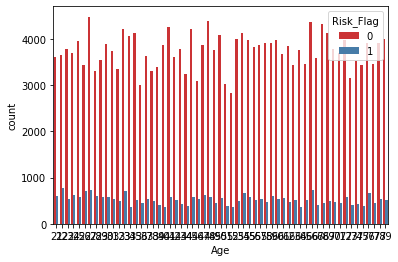

In [ ]:

df.dropna(inplace=True)
df.isnull().sum()

df.shape

sns.countplot(df['Age'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['Age'],df['Risk_Flag']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag       0     1
Experience             
0            9461  1582
1            9773  1802
2            9197  1890
3           10483  1586
4           10358  1449
5           10876  1565
6           11601  1557
7            9829  1403
8           10016  1334
9           11477  1459
10          11188  1315
11           9865  1584
12          11404  1396
13          10282  1431
14          11157  1212
15          10185  1808
16          10506  1600
17          10726  1405
18          11572  1029
19          10982  1305
20          10066  1284


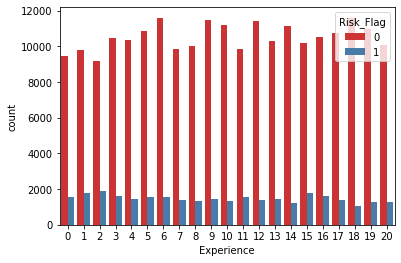

In [ ]:

sns.countplot(df['Experience'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['Experience'],df['Risk_Flag']))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag            0      1
Married/Single               
0                23092   2636
1               197912  28360


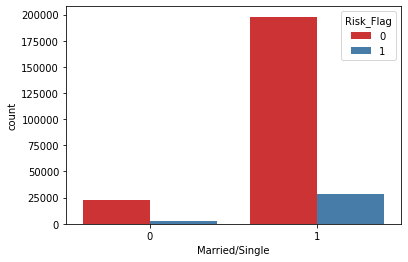

In [ ]:
sns.countplot(df['Married/Single'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['Married/Single'],df['Risk_Flag']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag             0      1
House_Ownership               
0                  6469    715
1                 11758   1160
2                202777  29121


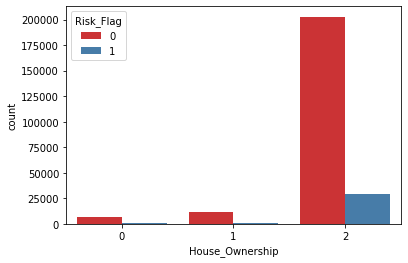

In [ ]:

sns.countplot(df['House_Ownership'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['House_Ownership'],df['Risk_Flag']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


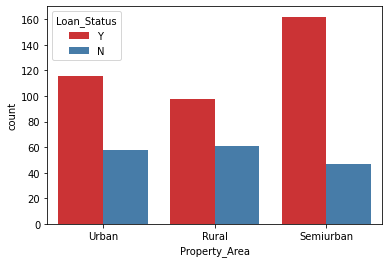

In [ ]:


sns.countplot(df['House_Ownership'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['House_Ownership'],df['Risk_Flag']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag           0      1
Car_Ownership               
0              153439  22561
1               67565   8435


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag      0    1
Profession           
0           4566  715
1           4101  567
2           4046  611
3           3952  709
4           4265  596
5           4116  642
6           4473  654
7           3803  690
8           4072  563
9           4624  581
10          3989  627
11          3902  511
12          4630  629
13          4682  690
14          4371  619
15          4206  602
16          4258  524
17          4223  506
18          4096  502
19          4754  605
20          4119  454
21          3570  478
22          4692  612
23          4634  533
24          3895  612
25          4494  634
26          3998  674
27          4570  596
28          4477  701
29          4732  518
30          4194  624
31          4107  521
32          4714  643
33          4635  582
34          4274  607
35          3532  555
36          4612  429
37          5247  710
38          4209  826
39          4389  555
40          4733  657
41          4091  690
42          4401  660
43        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Risk_Flag              0     1
CURRENT_HOUSE_YRS             
10                 42592  6082
11                 45390  6483
12                 45487  6304
13                 44477  6182
14                 43058  5945


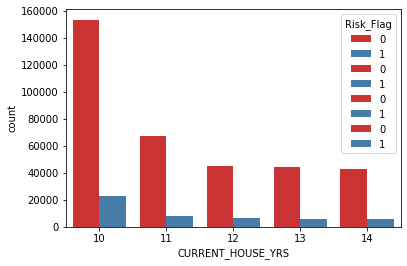

In [ ]:
sns.countplot(df['Car_Ownership'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['Car_Ownership'],df['Risk_Flag']))
sns.countplot(df['Profession'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['Profession'],df['Risk_Flag']))
sns.countplot(df['CURRENT_JOB_YRS'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['CURRENT_JOB_YRS'],df['Risk_Flag']))
sns.countplot(df['CURRENT_HOUSE_YRS'],hue=df['Risk_Flag'],palette='Set1')
print(pd.crosstab(df['CURRENT_HOUSE_YRS'],df['Risk_Flag']))

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

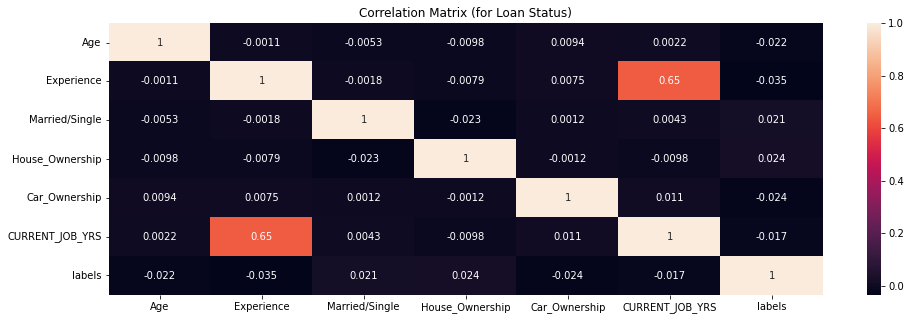

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(16,5))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [ ]:

df['Risk_Flag'].replace('Y',1,inplace=True)
df['Risk_Flag'].replace('N',0,inplace=True)
df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [ ]:
df.Age=df.Age.map({'Age>50':1,'Age>50':0})
df['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [41]:
markov_high = transition_matrixes(High)
markov_low = transition_matrixes(Low)
test_data1 = test_data.loc[test_data['labels']==1]
test_data0 = test_data.loc[test_data['labels']==0]

In [42]:
def Experience(test_data, transition_matrixes, dataset):

  test_data = np.array(test_data)
  Experience = dataset.loc[dataset['Experience'] == test_data[0]].shape[0] / dataset.shape[0]

  test_data[0] = test_data[0] // 10
  test_data[1] = test_data[1] // 5

  for index,transition_matrix in enumerate(transition_matrixes):
    Experience = Experience * transition_matrix[test_data[index],test_data[index+1]]
  return Experience

In [ ]:
##help from this code
   for i in range(len(test_labels)):
        if predicted_labels[i] == test_labels[i]:
            number_of_true += 1
            digit_number_of_true[int(test_labels[i])] += 1
        else:
            number_of_false += 1
            digit_number_of_false[int(test_labels[i])] += 1
    total_precision = number_of_true / (number_of_true + number_of_false)
    print('total precision:')
    print(total_precision)
    digit_precision = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    for digit in range(10):
        digit_precision[digit] = digit_number_of_true[digit] / (digit_number_of_true[digit] + digit_number_of_false[digit])
        print('digit ' + str(digit) + ' precision:')
        print(digit_precision[digit]) 

In [45]:
for index,data in test_data.iterrows():
  score_high = Experience(data, markov_high, High)  
  score_low = Experience(data, markov_low, Low)
  label = data['labels']
  prediction = 1 if score_high>score_low else 0
  if prediction == label and label==1:
    TruePosetive += 1
  if prediction == label and label == 0:
    TrueNegative += 1
  if prediction != label and prediction == 1:
    FulsePosetive += 1
  if prediction != label and prediction == 0:
    FulseNegative += 1

In [21]:
accuracy = (TruePosetive+TrueNegative)/(TruePosetive+TrueNegative+FulsePosetive+FulseNegative)

print('accuracy:', accuracy)


accuracy: 0.8055291005291005
